<a href="https://colab.research.google.com/github/lleejong/2019-KoreanUNIV-AI/blob/master/Colab_and_TF_Basics(DIY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

Colab은 클라우드 환경에서 구동되는 Jupyter notebook (ipython notebook) 개발 환경입니다.

또한, Colab은 GPU 혹은 TPU 하드웨어 가속을 지원합니다. (일반적으로 GPU 가속이 더 좋은 성능을 보입니다)

한 번 시험해볼까요?


In [0]:
# Your code here
print("Hello, Colab!")

Hello, Colab!


그래프를 그리는 matplotlib와 같은 라이브러리를 이용하여 시각화를 할 수도 있습니다. 이 때, 시각화된 그래프가 환경에 바로 표시됩니다.

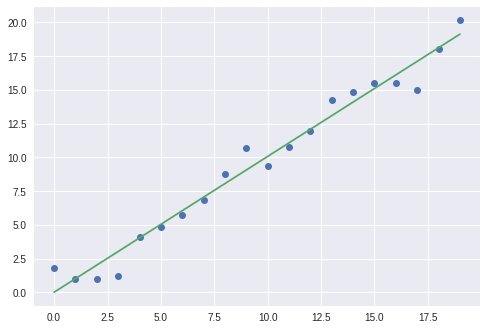

In [0]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i +np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x,y, 'o', np.arange(20), a*np.arange(20) + b, '-')

## Shell 사용
느낌표(!)로 시작되는 명령줄은 python 대신 shell에서 실행됩니다.
이를 활용하여 디렉토리를 생성하거나 (mkdir) python 패키지들을 관리(pip)할 수 있습니다.

현재 어떤 패키지들이 설치되어 있는지 확인해볼까요?

In [0]:
# Your code here
!pip --version
!pip freeze

pip 19.0.2 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
absl-py==0.7.0
alabaster==0.7.12
albumentations==0.1.12
altair==2.3.0
astor==0.7.1
astropy==3.0.5
atari-py==0.1.7
atomicwrites==1.3.0
attrs==18.2.0
audioread==2.1.6
autograd==1.2
Babel==2.6.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
bokeh==1.0.4
boto==2.49.0
boto3==1.9.95
botocore==1.12.95
Bottleneck==1.2.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.0
certifi==2018.11.29
cffi==1.12.0
chainer==5.0.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cupy-cuda100==5.2.0
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.5
cytoolz==0.9.0.1
daft==0.0.4
dask==0.20.2
dataclasses==0.6
datascience==0.10.6
decorator==4.3.2
defusedxml==0.5.0
dill==0.2.9
distributed==1.25.3
Django==2.1.7
dlib==19.16.0
dm-sonnet==1.23
doco

'pip install' 명령어를 이용하여 새로운 패키지를 설치할 수 있습니다.

In [0]:
# Your code here
!pip install matplotlib_venn

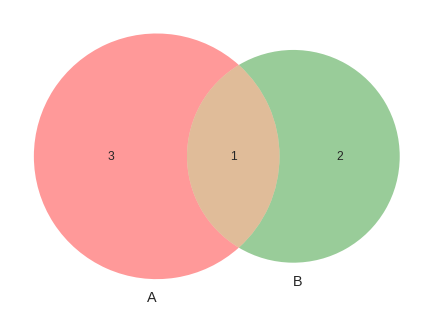

In [0]:
# Your code here
from matplotlib_venn import venn2
_ = venn2(subsets = (3,2,1))

# TensorFlow Basics


TensorFlow는 정적 그래프를 바탕으로 동작합니다. 이는 매 계산 시 동일한 계산 과정을 수행한다는 의미입니다. TensorFlow에서 동적 그래프의 사용은 아직 실험적입니다.

따라서 TensorFlow의 사용은 크게 두 단계로 진행됩니다.

1.   그래프 생성 – 변수와 계산 과정을 정의
2.   데이터를 입력하여 그래프에 따라 계산 수행

1단계는 메소드를 정의하는 것으로, 그리고 2단계는 정의된 메소드에 값을 주고 실제 계산을 수행하는 것으로 이해할 수 있습니다.

예를 들어, python으로 두 숫자를 입력 받아 그 합계를 반환하는 다음 함수를 볼까요?



In [0]:
# Your code here
def add( a, b):
  c = a + b
  return c

여기서 'add' 메소드는 계산 과정을 정의한 것이므로 값을 주고 계산을 실행하기 전까지는 아무런 일도 수행하지 않습니다.

In [0]:
# Your code here
print(add)

<function add at 0x7f2f35781730>


메소드를 사용하기 위해서는 다음과 같이 값을 입력으로 주고 실행하는 과정이 필요합니다.

In [0]:
# Your code here
print(add(123,45))

168


TensorFlow에서 그래프를 제작하는 것은 메소드를 정의하는 것과 유사합니다.

이번에는 앞서 정의한 'add'메소드와 동일한 역할을 수행하는 계산 그래프를 TensorFlow를 이용하여 제작해봅시다. (1단계)

In [0]:
# Your code here
import tensorflow as tf
print(tf.__version__)

1.13.0-rc1


In [0]:
# Your code here

a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)

b= tf.Print(b, [b])

add = tf.add(a, b)

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must make sure to import
the following:

  `from __future__ import print_function`



앞서 살펴본 python 메소드와 같이, TensorFlow를 이용하여 제작한 'add' 그래프는 그 자체로는 아무런 기능도 수행하지 않습니다.

In [0]:
# Your code here
print(add)

Tensor("Add_2:0", dtype=int32)


해당 그래프를 이용하기 위해서는 아래와 같이 입력값을 주고 계산을 실행해야 합니다. (2단계)

In [0]:
# Your code here

sess = tf.Session()
result = sess.run([add], feed_dict={a : 1, b: 2})[0]
print(result)

3
